In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def select_bic(X, patiency):
    X = X.sort_values('iteration p')
    best_p = 0
    best_bic = np.inf
    no_imp = 0
    for _, x in X.iterrows():
        if x['bic'] < best_bic:
            best_bic = x['bic']
            best_p = x['iteration p']
            no_imp = 0
        else:
            no_imp += 1
            if no_imp >= patiency:
                break
    return X[X['iteration p']==best_p]
    
def select_best(results, method, patiency=1):
    method_results = results[results['method']==method]
    best_iteration_p = method_results.groupby(['p', 'run']).apply(select_bic, patiency).reset_index(drop=True)
    return best_iteration_p

In [56]:
def plot_p_estimation(results, method, title='p estimation', p_values=[4, 8, 12, 16]):
    plt.figure(figsize=(12,6))
    plt.title(title +' '+ method)
    plt.xlabel('p')
    plt.ylabel('estimation probability')
    plt.xticks(p_values, p_values)
    for p in p_values:
        p_est = results.loc[(results['method']==method) & (results['p']==p), 'iteration p']
        est_bins = np.arange(p_est.max()+1) - 0.5
        est_mean = p_est.mean()
        label = 'p='+str(p)
        plt.hist(p_est, bins=est_bins, histtype='bar', label=label, align='mid', normed=1, alpha=0.5)
        plt.axvline(x=est_mean, linestyle='--', label=label)
    plt.legend()
    plt.show()

/home/ci/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


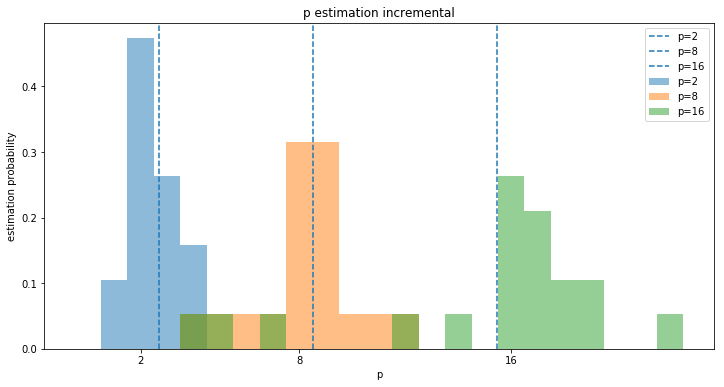

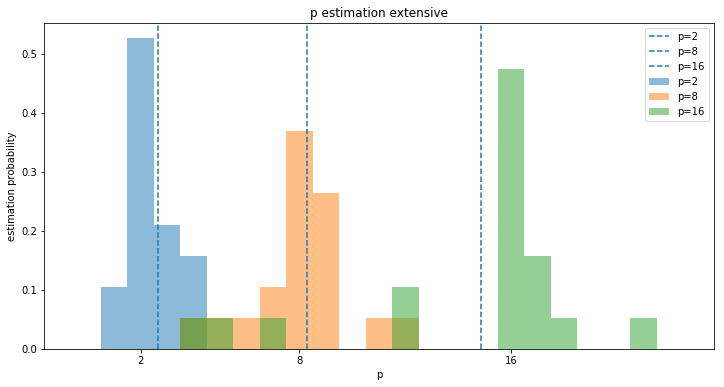

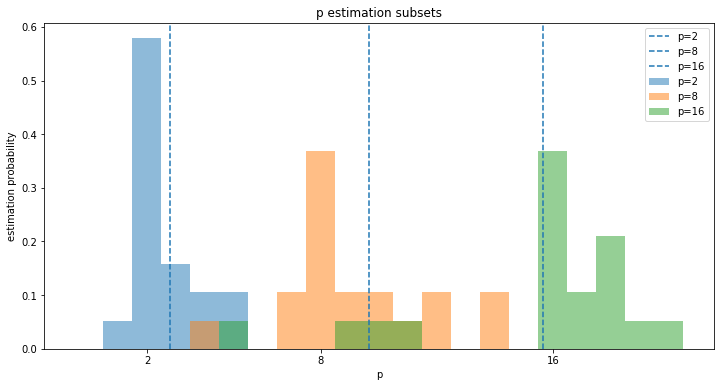

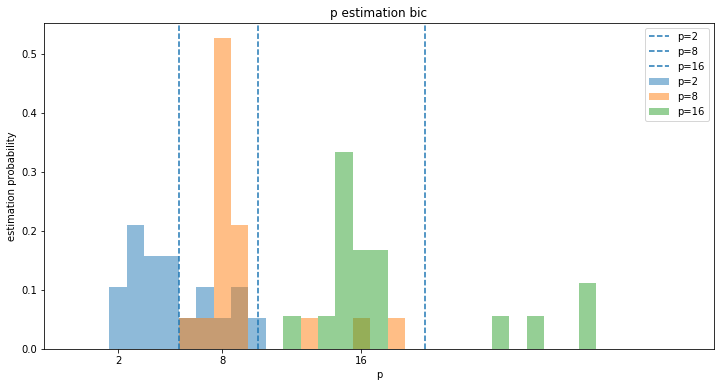

In [58]:
results = pd.read_csv('results/iterations/result.csv')
comp_results = pd.read_csv('results/iterations/comp_result.csv')
p_values=[2, 8, 16]
plot_p_estimation(select_best(results, 'incremental'), 'incremental', p_values=p_values)
plot_p_estimation(select_best(results, 'extensive'), 'extensive', p_values=p_values)
plot_p_estimation(select_best(results, 'subsets', patiency=3), 'subsets', p_values=p_values)
plot_p_estimation(comp_results, 'bic', p_values=p_values)